In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression/BMRI.JK.csv
/kaggle/input/linear-regression/BDMN.JK.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# **BDMN DATA LOAD**

In [3]:
BDMN = pd.read_csv('../input/linear-regression/BDMN.JK.csv')
BDMN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     int64  
 2   High       13 non-null     int64  
 3   Low        13 non-null     int64  
 4   Close      13 non-null     int64  
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes


In [4]:
display(BDMN)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/1/2021,2170,2530,2140,2350,2295.747803,110748000
1,9/1/2021,2400,3050,2350,2660,2598.591064,284101500
2,10/1/2021,2650,2980,2610,2690,2627.898438,107574100
3,11/1/2021,2700,2700,2400,2410,2354.362549,110416900
4,12/1/2021,2440,2510,2300,2350,2295.747803,61795900
5,1/1/2022,2350,2460,2300,2400,2344.593506,41035300
6,2/1/2022,2410,2540,2350,2380,2325.055176,54677100
7,3/1/2022,2390,2470,2270,2440,2383.669922,43934900
8,4/1/2022,2440,2510,2300,2450,2393.439209,56452900
9,5/1/2022,2450,2560,2320,2560,2560.000000,51642300


In [5]:
print(BDMN.shape)

(13, 7)


In [6]:
print(BDMN.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     int64  
 2   High       13 non-null     int64  
 3   Low        13 non-null     int64  
 4   Close      13 non-null     int64  
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes
None


# **BMRI DATA LOAD**

In [7]:
BMRI = pd.read_csv('../input/linear-regression/BMRI.JK.csv')
BMRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     int64  
 2   High       13 non-null     int64  
 3   Low        13 non-null     int64  
 4   Close      13 non-null     int64  
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes


In [8]:
display(BMRI)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/1/2021,5775,6175,5625,6100,5822.413086,726088000
1,9/1/2021,6100,6350,5900,6150,5870.137695,770940800
2,10/1/2021,6150,7325,6050,7175,6848.494141,1296133600
3,11/1/2021,7250,7500,6850,7000,6681.457520,944089900
4,12/1/2021,7000,7350,6950,7025,6705.319824,616972700
5,1/1/2022,7100,7775,6925,7475,7134.842285,724225600
6,2/1/2022,7525,7950,7350,7700,7349.603516,806827300
7,3/1/2022,7675,8100,7500,7900,7540.501953,1611658200
8,4/1/2022,7900,9075,7575,8950,8950.000000,1345265900
9,5/1/2022,8950,8950,7725,8500,8500.000000,1434930200


In [9]:
print(BMRI.shape)

(13, 7)


In [10]:
print(BMRI.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     int64  
 2   High       13 non-null     int64  
 3   Low        13 non-null     int64  
 4   Close      13 non-null     int64  
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes
None


# **Data Preparation**

In [11]:
BDMN_closing=pd.read_csv('../input/linear-regression/BDMN.JK.csv' , usecols =['Close'])
BDMN = BDMN_closing.rename(columns={'Close': 'BDMN'})
display(BDMN)

,BDMN
0,2350
1,2660
2,2690
3,2410
4,2350
5,2400
6,2380
7,2440
8,2450
9,2560


In [12]:
BMRI_closing=pd.read_csv('../input/linear-regression/BMRI.JK.csv' , usecols =['Close'])
BMRI = BMRI_closing.rename(columns={'Close': 'BMRI'})
display(BMRI)

,BMRI
0,6100
1,6150
2,7175
3,7000
4,7025
5,7475
6,7700
7,7900
8,8950
9,8500


# **MERGING DATA**

In [13]:
data = BMRI.join(BDMN)
display(data)

,BMRI,BDMN
0,6100,2350
1,6150,2660
2,7175,2690
3,7000,2410
4,7025,2350
5,7475,2400
6,7700,2380
7,7900,2440
8,8950,2450
9,8500,2560


In [14]:
print(data.shape)

(13, 2)


In [15]:
data.describe()

,BMRI,BDMN
count,13.000000,13.000000
mean,7457.692308,2439.230769
std,809.152374,121.892134
min,6100.000000,2320.000000
25%,7025.000000,2350.000000
50%,7475.000000,2400.000000
75%,7900.000000,2450.000000
max,8950.000000,2690.000000


# **Linear Regression**
Constanta and Coefficient

In [16]:
X = data['BDMN'].values
Y = data['BMRI'].values

In [17]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#Print coefficients
print(b1,b0)

-0.6235438778151693 8978.659720424539


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

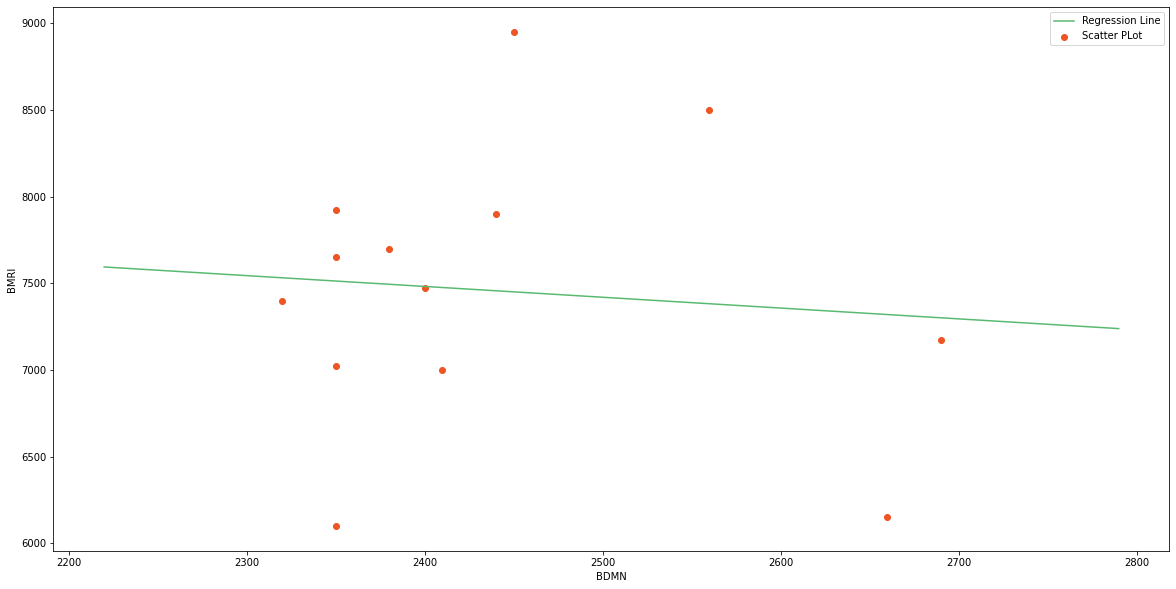

In [19]:
#Plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#Ploting line
plt.plot(x,y, color='#58b970', label = 'Regression Line')

#PLoting Scatter Points
plt.scatter(X,Y, c='#ef5423', label='Scatter PLot')

plt.xlabel('BDMN')
plt.ylabel('BMRI')
plt.legend()
plt.show()

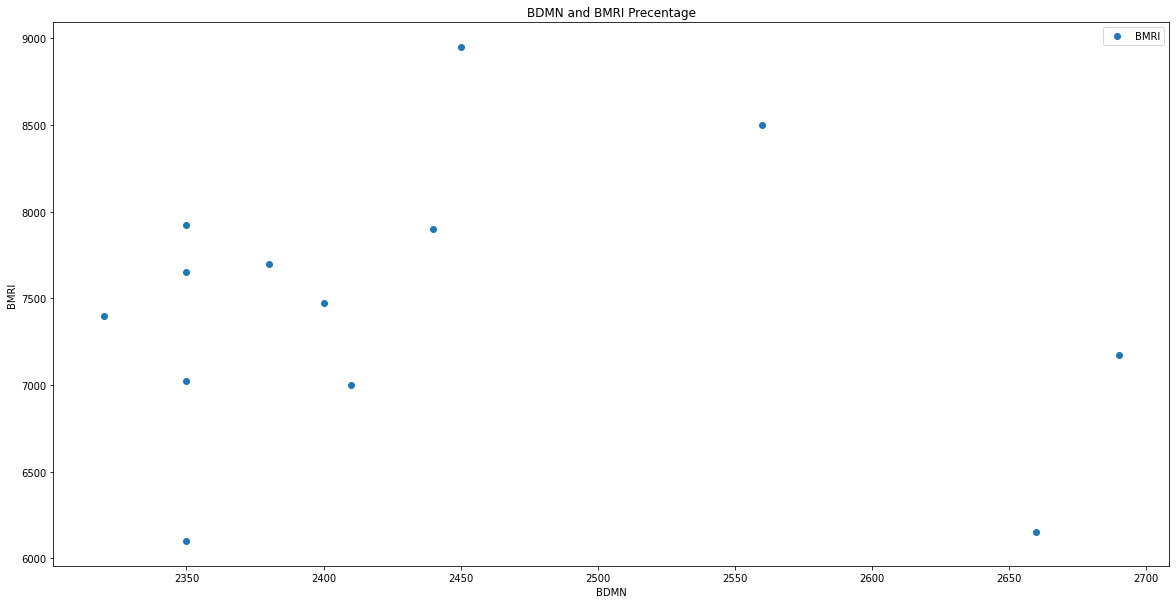

In [20]:
data.plot(x='BDMN', y='BMRI', style='o')
plt.title('BDMN and BMRI Precentage')
plt.xlabel('BDMN')
plt.ylabel('BMRI')
plt.show()

# **R Squared**

In [21]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.008823172580221916
